# Puesta a punto: Inicialización de librerías

In [0]:
#Inicializar semilla a 0
set.seed(0)
#Cargar libreria de keras y comprobar disponibilidad
devtools::install_github("rstudio/keras")
#Tarda mucho en cargar en Colab
install.packages('caret', dependencies = TRUE)
install.packages("pROC")
install.packages("ROCR")
library(ROCR)
library(caret)
library(keras)
is_keras_available()

reticulate (NA    -> 1.16 ) [CRAN]
tensorflow (NA    -> 2.2.0) [CRAN]
tfruns     (NA    -> 1.4  ) [CRAN]
zeallot    (NA    -> 0.1.0) [CRAN]
rappdirs   (NA    -> 0.3.1) [CRAN]
config     (NA    -> 0.3  ) [CRAN]
processx   (3.4.1 -> 3.4.2) [CRAN]


Installing 7 packages: reticulate, tensorflow, tfruns, zeallot, rappdirs, config, processx

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpBZd81Q/remotes7f161cd6d7/rstudio-keras-45a0768/DESCRIPTION’
─  preparing ‘keras’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts (366ms)
─  checking for empty or unneeded directories
   Removed empty directory ‘keras/man-roxygen’
─  building ‘keras_2.3.0.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘numDeriv’, ‘SQUAREM’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘R.cache’, ‘gdata’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘plotrix’, ‘lava’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘iterators’, ‘data.table’, ‘gower’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘Formula’, ‘plotmo’, ‘TeachingDemos’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ISwR’, ‘corpcor’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’, ‘BradleyTerry2’, ‘e1071’, ‘earth’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, ‘ellipse’, ‘mda’, ‘mlbench’, ‘MLmetrics’, ‘party’, ‘pls’, ‘proxy’, ‘randomForest’, ‘RAN

[1] TRUE

# Carga del conjunto de imagenes utilizado 

**Ejecutar antes de ejecutar cualquier Modelo Predictivo**

In [0]:
#Cargar libreria util de tidyverse
library(tidyverse)

#Cargar MNIST de forma general
mnist <- dataset_fashion_mnist()

#Utilizar los datos cargados anteriormente para conseguir de forma separada:
#Datos de imagenes de entrenamiento
x_train <- mnist$train$x
#Etiquetas de las imagenes de entrenamiento
y_train <- mnist$train$y
#Datos de imagenes de test
x_test  <- mnist$test$x
#Etiqueta de imagenes de test
y_test  <- mnist$test$y

#Redimensionar imagenes para conseguir un formato que pueda utilizar la red neuronal
x_train <- array_reshape(x_train, c(nrow(x_train), 28, 28, 1))  # 60.000 matrices 28x28x1
x_test  <- array_reshape(x_test,  c(nrow(x_test),  28, 28, 1))  # 10.000 matrices 28x28x1
#El uno final es para indicar que son imagenes en escala de grises (1 canal)

#Reescalar valores de imagenes desde [0, 255] a [0, 1]
x_train <- x_train / 255
x_test  <- x_test  / 255

#Conservar valore soriginales para el visualizador
y_train_ori  <- y_train
y_test_ori  <- y_test

#Codificar la clase de forma biaria
y_train <- to_categorical(y_train, 10)
y_test  <- to_categorical(y_test,  10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()



# Visualización del conjunto de imágenes

* Visualización de una parte del conjunto de datos para comprobar como son.

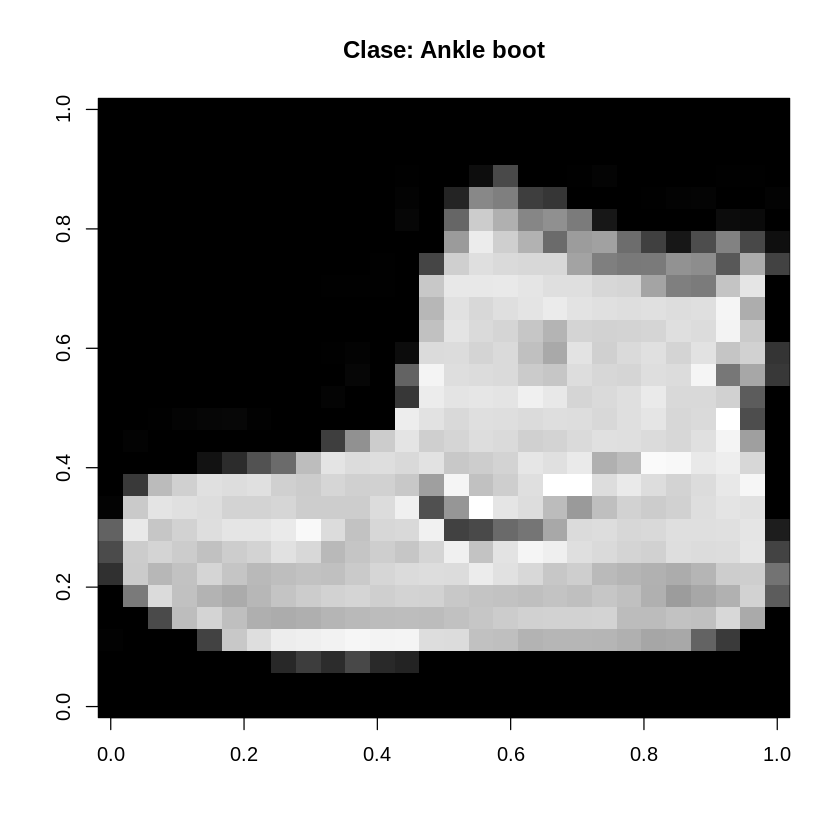

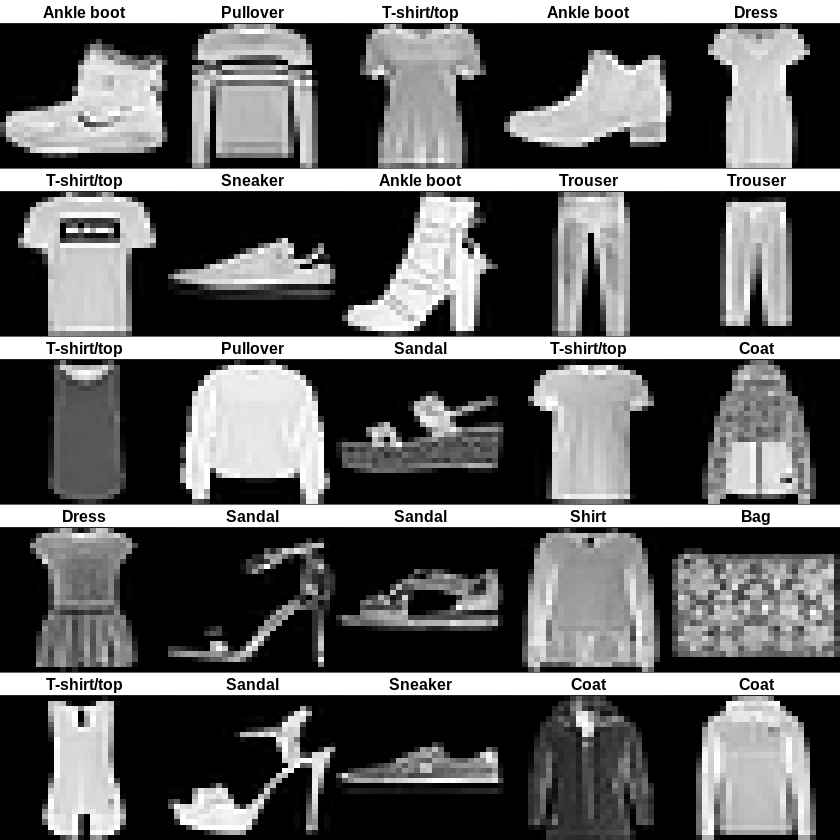

In [0]:
library(tidyr)
library(ggplot2)

# Poner los nombres a cada una de las clases
class_names = c('T-shirt/top',
                'Trouser',
                'Pullover',
                'Dress',
                'Coat', 
                'Sandal',
                'Shirt',
                'Sneaker',
                'Bag',
                'Ankle boot')

# Ver una imagen en concreto para ver como se forman
#image(t(x_train[2, 28:1, , ]))
image(t(x_train[1, 28:1, , ]), col = grey(seq(0, 1, length = 256)))
title(paste("Clase:", class_names[10]))

# Mostrar las 25 primeras con sus etiquetas
par(mfcol=c(5,5))
par(mar=c(0, 0, 1.5, 0), xaxs='i', yaxs='i')
for (i in 1:25) { 
  img <- x_train[i, , , ]
  img <- t(apply(img, 2, rev)) 
  image(1:28, 1:28, img, col = gray((0:255)/255), xaxt = 'n', yaxt = 'n',
        main = paste(class_names[y_train_ori[i] + 1]))
}

# MLP Básica

* Arquitectura:
  1. Capa de aplanado
  2. Capa densa de 128 neuronas con "relu" de función de activación
  3. Capa de salida con 10 neuronas con función de activación "softmax"

**Esta red se ejecutará con diferentes parámetros de compilación y entrenamiento, para comprobar que combinación funciona mejor (una rejilla a mano)**

* Función de optimización: Adam y Rmsprop.
* Número de épocas: 10 y 20.
* Tamaño del batch: 100 y 150.



Model: "sequential_6"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
flatten_6 (Flatten)                 (None, 784)                     0           
________________________________________________________________________________
dense_12 (Dense)                    (None, 128)                     100480      
________________________________________________________________________________
dense_13 (Dense)                    (None, 10)                      1290        
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
________________________________________________________________________________


`geom_smooth()` using formula 'y ~ x'



loss  accuracy 
0.3534024 0.8865000

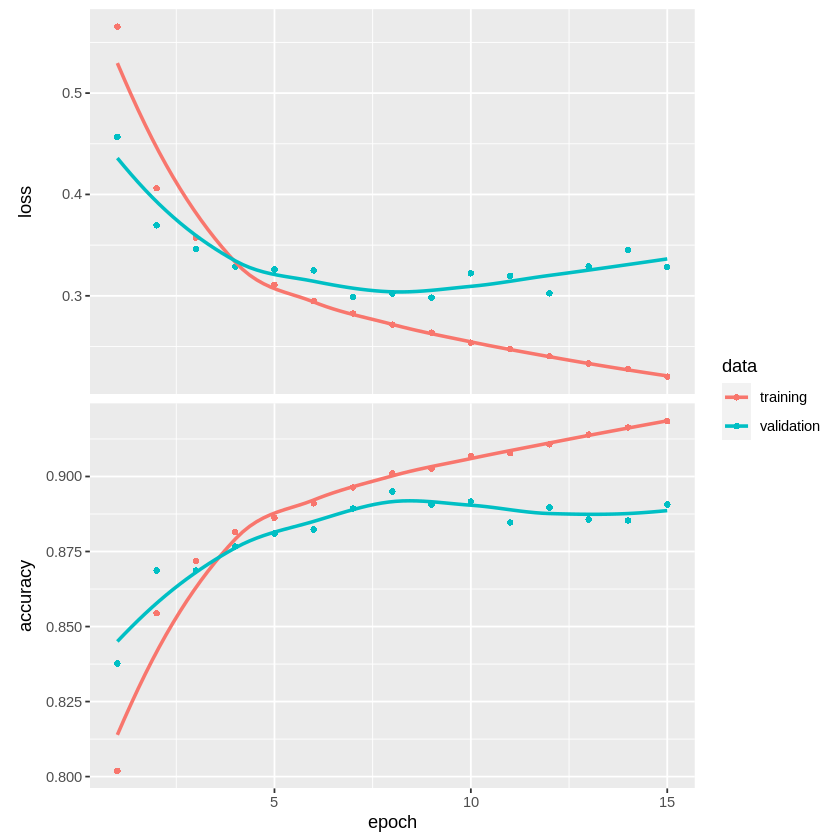

   user  system elapsed 
 33.740   5.627  32.043 


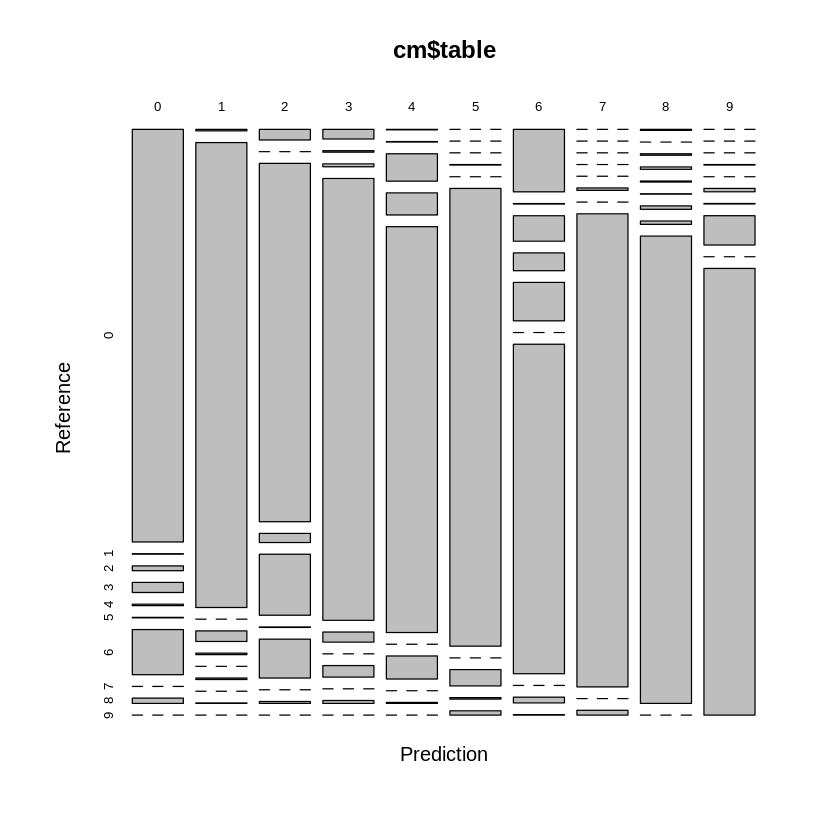

In [0]:
##########################################
## CREACIÓN Y ENTRENAMIENTO DEL MODELO 
##########################################

#Para calcular el tiempo de la ejecucion
t <- proc.time()

# Definir arquitectura
model <- keras_model_sequential() 
model %>% 
  layer_flatten(input_shape = c(28, 28, 1)) %>%
  layer_dense(units = 128, activation = "relu") %>%
  layer_dense(units = 10, activation = "softmax")
  
summary(model)

# Compilar modelo
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_rmsprop(),
  metrics = c('accuracy')
)

# Entrenamiento
history <- model %>% 
  fit(
    verbose=1,
    verbose_iter=1,
    x_train, y_train, 
    epochs = 15,
    batch_size = 100,
    validation_split = 0.2
  )

# Guardar modelo (HDF5)
#model %>% save_model_hdf5("minist_cnn_basico.h5")

# Visualizar entrenamiento
plot(history)

##########################################
## EVALUAR EL MODELO CON LOS DATOS DE TEST
##########################################

# Calcular metrica sobre datos de validación
model %>% evaluate(x_test, y_test)

# Obtener predicciones de clase
predictions <- model %>% 
  predict_classes(x_test)

# Crear matriz de confusión
cm <- confusionMatrix(as.factor(mnist$test$y), as.factor(predictions))
cm_prop <- prop.table(cm$table)
plot(cm$table)

#Tiempo que tarda en crear el modelo y evaluarlo
t_final <- proc.time() - t
print(t_final)


# CNN Primeras Pruebas (Diferentes arquitecturas, funciones y parámetros)

## Prueba 1.0

* Arquitectura:
  1. Capa convolucional de 20 filtros de 5 x 5, con función de activación "relu"
  2. Capa de polling de tamaño 2 x 2
  3. Capa de aplanado
  4. Capa densa de 100 neuronas con "relu" de función de activación
  5. Capa de salida con 10 neuronas con función de activación "softmax"

* Compilacion del modelo:
  * Función de pérdida = entropía cruzada
  * Función de optimización = Adam

* Parámetros de entrenamiento:
  * Iteraciones = 10
  * Tamaño del batch = 128
  * Conjunto de validación (20% del conjunto de entrenamiento)


## Prueba 2.0 

* Leve modificación en arquitectura: capa 4 -> 100 neuronas con función de activación "sigmoide"

* Modificación de la función de optimización RmsProp

## Prueba 3.0

* Modificación de la arquitectura:
  1. Capa convolucional de 64 filtros de 5 x 5 con la función de activación "relu" y el tratamiento de bordes "same"
  2. Capa de polling de 2 x 2
  3. Capa convolucional de 32 filtros de 3 x 3 con la función de activación "relu" y el tratamiento de bordes "same"
  4. Capa de polling de 1 x 1
  5. Capa de aplanado
  6. Capa densa de 128 neuronas con la función de activación "relu"
  7. Capa de Dropout (apagado de algunos valores) con 0.4 de probabildad
  8. Capa densa de 64 neuronas con la función de activación "relu"
  9. Capa de Dropout (apagado de algunos valores) con 0.5 de probabildad
  10. Capa densa de 10 neuronas con función de activación "softmax"

## Prueba 4.0

* Modificación de la arquitectura:
  1. Capa convolucional de 32 filtros de 3 x 3 con la función de activación "relu" y el tratamiento de bordes "same"
  2. Capa de normalización de batch
  3.  Capa convolucional de 32 filtros de 3 x 3 con la función de activación "relu" y el tratamiento de bordes "same"
  4. Capa de normalización de batch
  5. Capa convolucional de 64 filtros de 3 x 3 con la función de activación "relu" y el tratamiento de bordes "same"
  6. Capa de normalización de batch
  7. Capa convolucional de 64 filtros de 3 x 3 con la función de activación "relu" y el tratamiento de bordes "same"
  8. Capa de normalización de batch
  9. Capa de polling de 2 x 2
  10. Capa de aplanado
  11. Capa densa de 256 neuronas con la función de activación "relu"
  12. Capa de normalización de batch
  13. Capa de Dropout (apagado de algunos valores) con 0.25 de probabildiad
  14. Capa densa de 10 neuronas con función de activación "softmax"


**Todas las Redes se ejecutarán con diferentes parámetros de compilación y entrenamiento, para comprobar que combinación funciona mejor (una rejilla a mano)**

* Función de optimización: Adam y Rmsprop.
* Número de épocas: 10 y 20.
* Tamaño del batch: 100 y 150.

Una vez que se consiga la mejor configuración posible, se probarán los siguientes parámetros:
    
* Factor de aprendizaje: 0.01, 0.05.
* Decremento de aprendizaje: 0, 0.12 y 0.2
    

Model: "sequential_7"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_13 (Conv2D)                  (None, 24, 24, 20)              520         
________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)      (None, 12, 12, 20)              0           
________________________________________________________________________________
flatten_7 (Flatten)                 (None, 2880)                    0           
________________________________________________________________________________
dense_14 (Dense)                    (None, 128)                     368768      
________________________________________________________________________________
dense_15 (Dense)                    (None, 10)                      1290        
Total params: 370,578
Trainable params: 370,578
Non-trainable params: 0
_______________

`geom_smooth()` using formula 'y ~ x'



loss  accuracy 
0.2973664 0.9095000

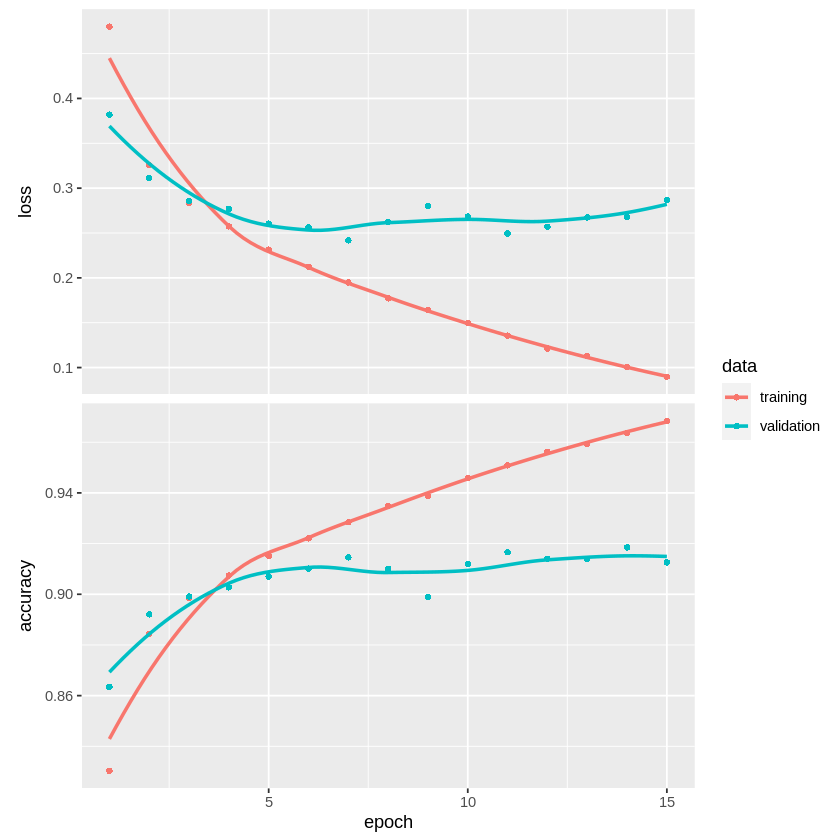

   user  system elapsed 
 42.677  11.153  46.899 


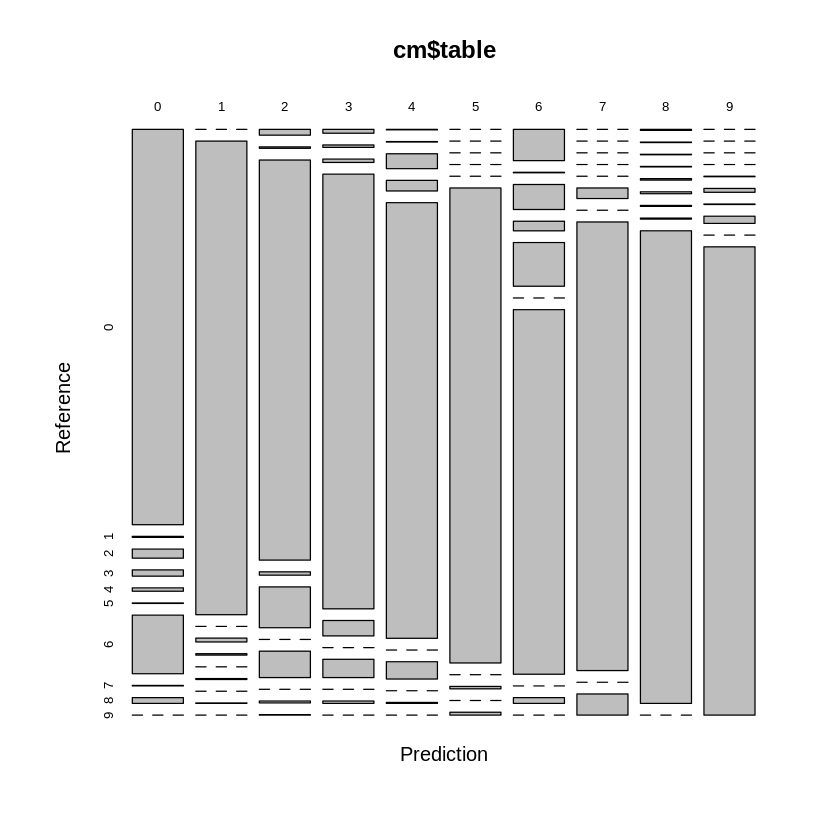

In [0]:
#PRUEBA 1.0

##########################################
## CREACIÓN Y ENTRENAMIENTO DEL MODELO 
##########################################

#Para calcular el tiempo de la ejecucion
t <- proc.time()

# Definir arquitectura
model <- keras_model_sequential() 
model %>% 
  layer_conv_2d(filters = 20, kernel_size = c(5, 5), activation = "relu", input_shape = c(28, 28, 1)) %>%
  layer_max_pooling_2d(pool_size = c(2, 2)) %>%
  layer_flatten() %>%
  layer_dense(units = 128, activation = "relu") %>%
  layer_dense(units = 10, activation = "softmax")
  
summary(model)

# Compilar modelo
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_adam(),
  metrics = c('accuracy')
)

# Entrenamiento
history <- model %>% 
  fit(
    verbose=1,
    verbose_iter=1,
    x_train, y_train, 
    epochs = 15, 
    batch_size = 100,
    validation_split = 0.2
  )

# Guardar modelo (HDF5)
#model %>% save_model_hdf5("minist_cnn_basico.h5")

# Visualizar entrenamiento
plot(history)

##########################################
## EVALUAR EL MODELO CON LOS DATOS DE TEST
##########################################

# Calcular metrica sobre datos de validación
model %>% evaluate(x_test, y_test)

# Obtener predicciones de clase
predictions <- model %>% 
  predict_classes(x_test)

# Crear matriz de confusión
cm <- confusionMatrix(as.factor(mnist$test$y), as.factor(predictions))
cm_prop <- prop.table(cm$table)
plot(cm$table)

#Tiempo que tarda en crear el modelo y evaluarlo
t_final <- proc.time() - t
print(t_final)

# https://github.com/rstudio/keras/blob/master/tests/testthat/test-generators.R

Model: "sequential_10"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_17 (Conv2D)                  (None, 24, 24, 20)              520         
________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)      (None, 12, 12, 20)              0           
________________________________________________________________________________
flatten_10 (Flatten)                (None, 2880)                    0           
________________________________________________________________________________
dense_21 (Dense)                    (None, 100)                     288100      
________________________________________________________________________________
dense_22 (Dense)                    (None, 10)                      1010        
Total params: 289,630
Trainable params: 289,630
Non-trainable params: 0
______________

`geom_smooth()` using formula 'y ~ x'



loss accuracy 
0.252787 0.911600

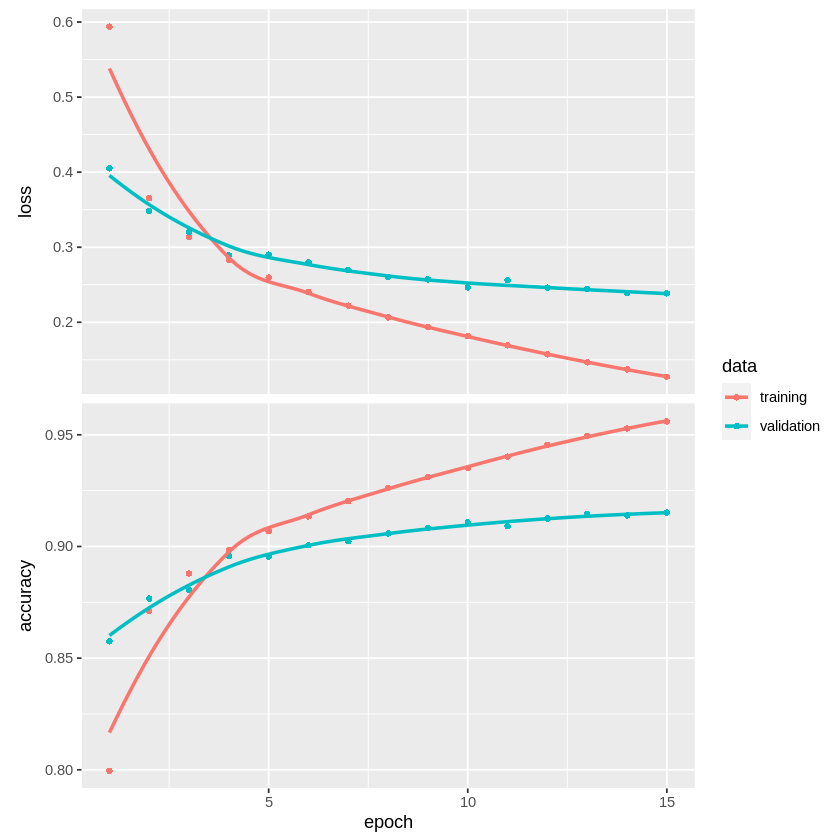

   user  system elapsed 
 42.120  10.708  46.035 


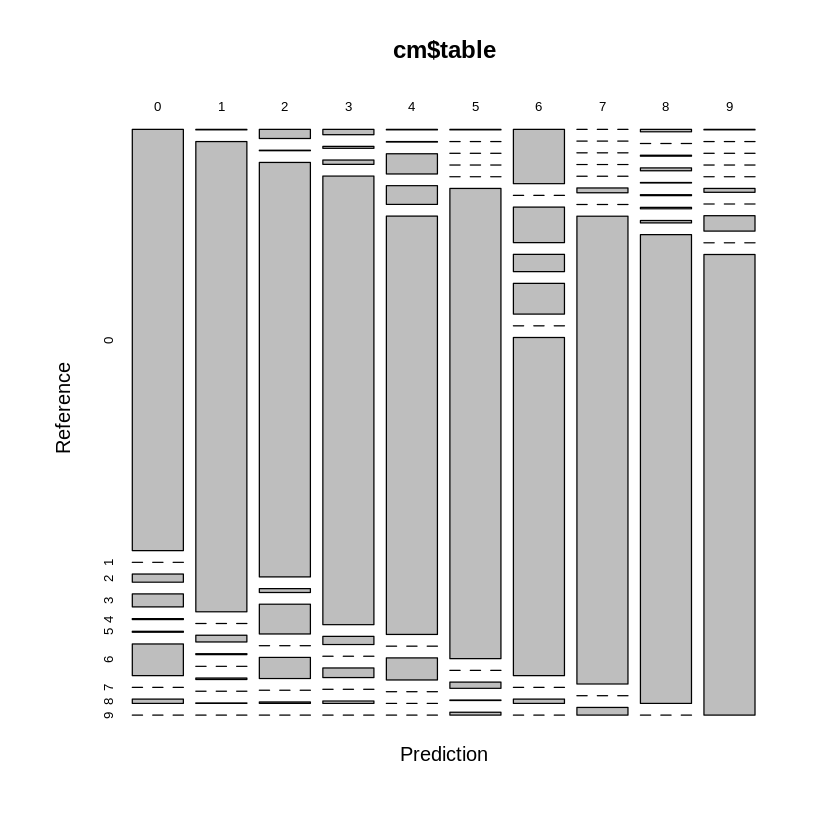

In [0]:
#PRUEBA 2.0

##########################################
## CREACIÓN Y ENTRENAMIENTO DEL MODELO 
##########################################

#Para calcular el tiempo de la ejecucion
t <- proc.time()

# Definir arquitectura
model <- keras_model_sequential() 
model %>% 
  layer_conv_2d(filters = 20, kernel_size = c(5, 5), activation = "relu", input_shape = c(28, 28, 1)) %>%
  layer_max_pooling_2d(pool_size = c(2, 2)) %>%
  layer_flatten() %>%
  layer_dense(units = 100, activation = "sigmoid") %>%
  layer_dense(units = 10, activation = "softmax")
  
summary(model)

# Compilar modelo
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_adam(),
  metrics = c('accuracy')
)

# Entrenamiento
history <- model %>% 
  fit(
    verbose=1,
    verbose_iter=1,
    x_train, y_train, 
    epochs = 15,
    batch_size = 100,
    validation_split = 0.2
  )

# Guardar modelo (HDF5)
#model %>% save_model_hdf5("minist_cnn_basico.h5")

# Visualizar entrenamiento
plot(history)

##########################################
## EVALUAR EL MODELO CON LOS DATOS DE TEST
##########################################

# Calcular metrica sobre datos de validación
model %>% evaluate(x_test, y_test)

# Obtener predicciones de clase
predictions <- model %>% 
  predict_classes(x_test)

# Crear matriz de confusión
cm <- confusionMatrix(as.factor(mnist$test$y), as.factor(predictions))
cm_prop <- prop.table(cm$table)
plot(cm$table)

#Tiempo que tarda en crear el modelo y evaluarlo
t_final <- proc.time() - t
print(t_final)

# https://github.com/rstudio/keras/blob/master/tests/testthat/test-generators.R

Model: "sequential_9"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_15 (Conv2D)                  (None, 24, 24, 64)              1664        
________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)      (None, 12, 12, 64)              0           
________________________________________________________________________________
conv2d_16 (Conv2D)                  (None, 10, 10, 64)              36928       
________________________________________________________________________________
max_pooling2d_7 (MaxPooling2D)      (None, 10, 10, 64)              0           
________________________________________________________________________________
flatten_9 (Flatten)                 (None, 6400)                    0           
________________________________________________________________________________
dense_

`geom_smooth()` using formula 'y ~ x'



loss  accuracy 
0.3019294 0.9044000

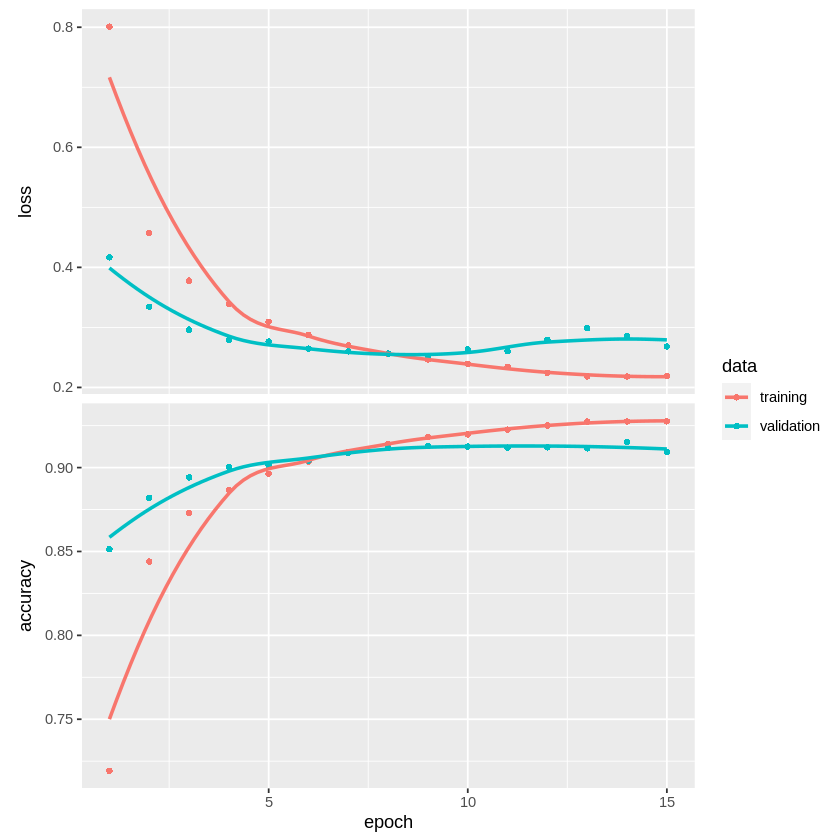

   user  system elapsed 
 63.438  19.521  78.991 


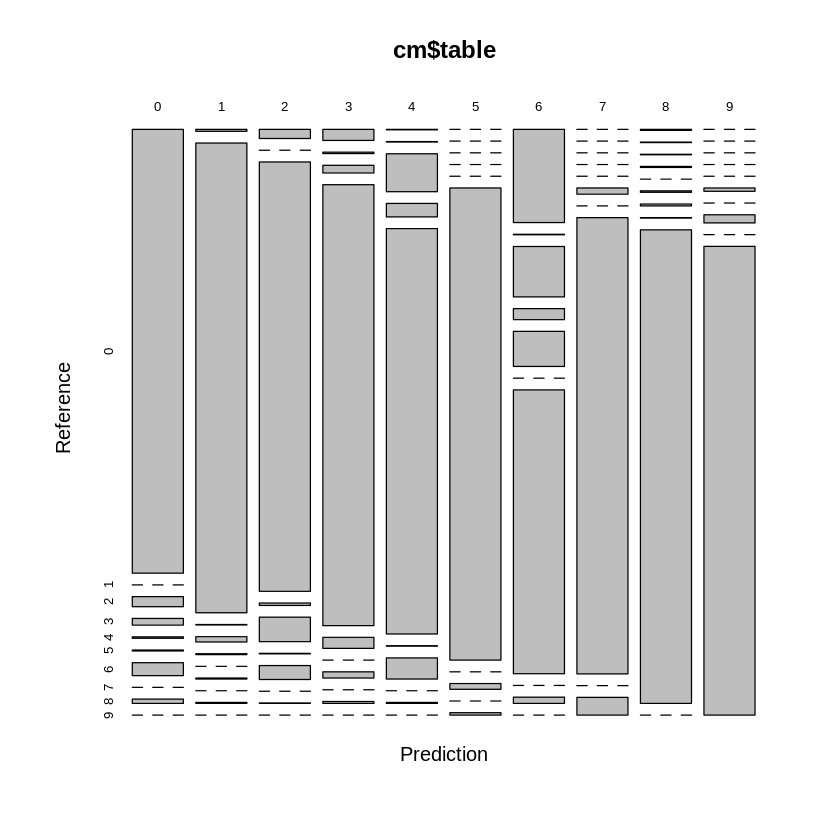

In [0]:
# PRUEBA 3.0

########################################
## CREACIÓN Y ENTRENAMIENTO DEL MODELO 
##########################################

#Para calcular el tiempo de la ejecucion
t <- proc.time()

# Definir arquitectura
model <- keras_model_sequential() 
model %>% 
  layer_conv_2d(filters = 64, kernel_size = c(5, 5), activation = "relu", input_shape = c(28, 28, 1)) %>%
  layer_max_pooling_2d(pool_size = c(2, 2)) %>%
  layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = "relu") %>%
  layer_max_pooling_2d(pool_size = c(1, 1)) %>%
  layer_flatten() %>%
  layer_dense(units = 128, activation = "relu") %>%
  layer_dropout(0.4) %>%
  layer_dense(units = 64, activation = "relu") %>%
  layer_dropout(0.5) %>%
  layer_dense(units = 10, activation = "softmax")
  
summary(model)



#lr <- 0.0001
#decay <- lr/25

#opt <- function(lr, decay) {
#optimizer_adam(lr = lr, decay = decay)
#}

# Compilar modelo
model %>% compile(
  loss = 'categorical_crossentropy',
  #optimizer = opt(lr, decay),
  optimizer_rmsprop(),
  metrics = c('accuracy')
)

# Entrenamiento
history <- model %>% 
  fit(
    x_train, y_train, 
    epochs = 15, 
    batch_size = 150,
    validation_split = 0.2
  )

# Guardar modelo (HDF5)
#model %>% save_model_hdf5("minist_cnn_basico.h5")

# Visualizar entrenamiento
plot(history)

##########################################
## EVALUAR EL MODELO CON LOS DATOS DE TEST
##########################################

# Calcular metrica sobre datos de validación
model %>% evaluate(x_test, y_test)

# Obtener predicciones de clase
predictions <- model %>% 
  predict_classes(x_test)

# Crear matriz de confusión
cm <- confusionMatrix(as.factor(mnist$test$y), as.factor(predictions))
cm_prop <- prop.table(cm$table)
plot(cm$table)

#Tiempo que tarda en crear el modelo y evaluarlo
t_final <- proc.time() - t
print(t_final)


Model: "sequential_11"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_18 (Conv2D)                  (None, 28, 28, 32)              320         
________________________________________________________________________________
batch_normalization_15 (BatchNormal (None, 28, 28, 32)              128         
________________________________________________________________________________
conv2d_19 (Conv2D)                  (None, 28, 28, 32)              9248        
________________________________________________________________________________
batch_normalization_16 (BatchNormal (None, 28, 28, 32)              128         
________________________________________________________________________________
conv2d_20 (Conv2D)                  (None, 28, 28, 64)              18496       
________________________________________________________________________________
batch

`geom_smooth()` using formula 'y ~ x'



loss  accuracy 
0.3992481 0.9267000

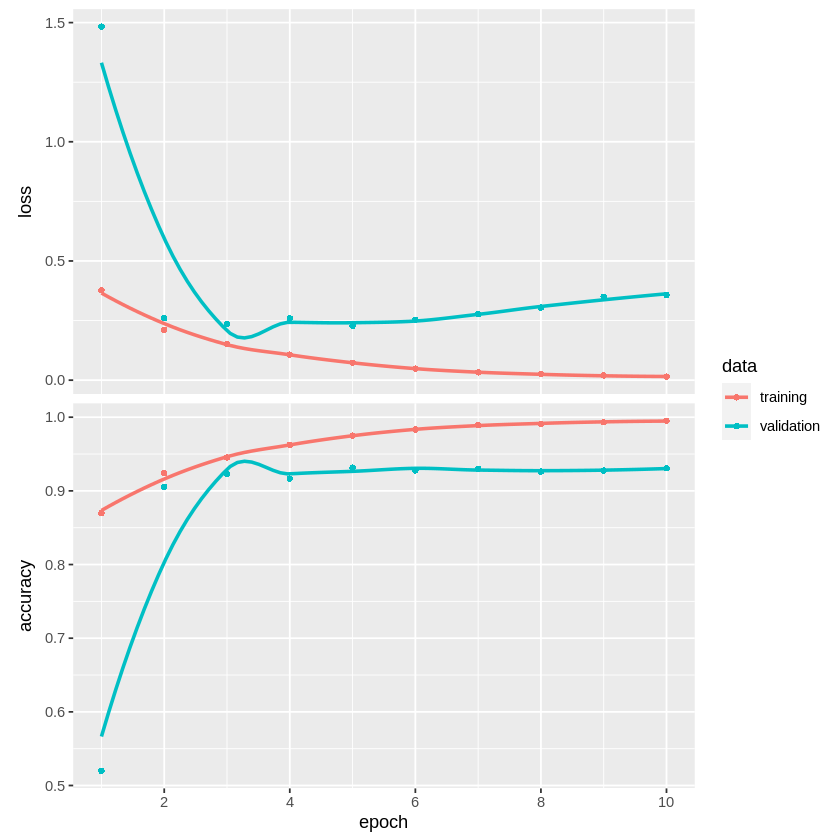

   user  system elapsed 
127.790  48.962 175.387 


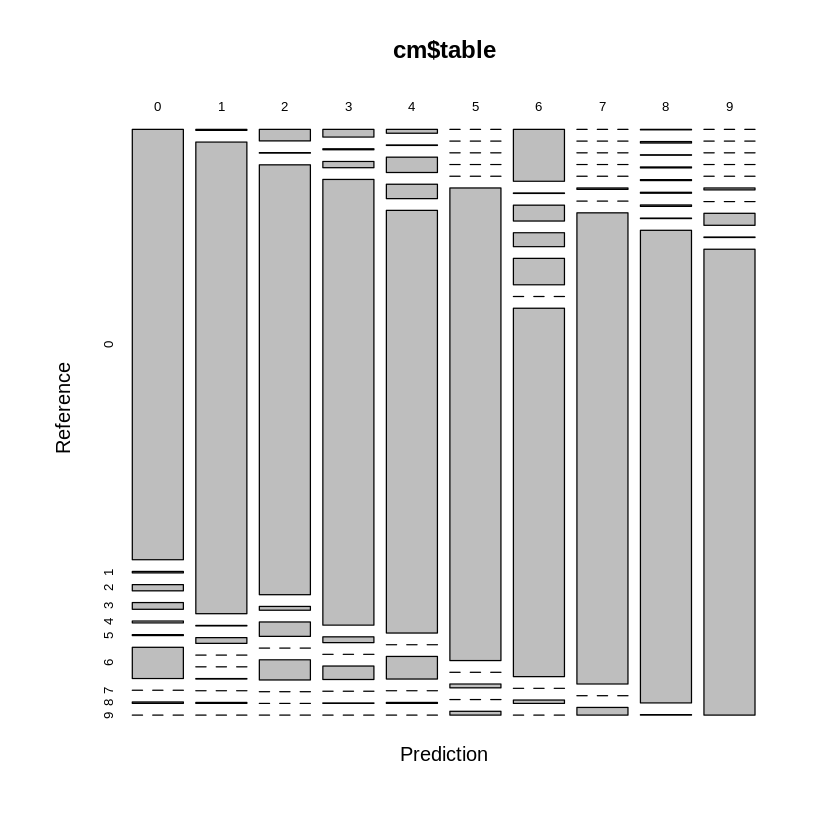

In [0]:
#PRUEBA 4.0

##########################################
## CREACIÓN Y ENTRENAMIENTO DEL MODELO 
##########################################

#Para calcular el tiempo de la ejecucion
t <- proc.time()

# Definir arquitectura
model <- keras_model_sequential() 
model %>% 
  layer_conv_2d(filters = 32, kernel_size = c(3, 3), activation = "relu", padding = "Same", input_shape = c(28, 28, 1)) %>%
  layer_batch_normalization() %>%
  layer_conv_2d(filters = 32, kernel_size = c(3, 3), activation = "relu", padding = "Same") %>% 
  layer_batch_normalization() %>%
  layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = "relu", padding = "Same") %>% 
  layer_batch_normalization() %>% 
  layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = "relu", padding = "Same") %>% 
  layer_batch_normalization() %>%
  layer_max_pooling_2d(pool_size = c(2, 2)) %>%
  layer_flatten() %>%
  layer_dense(units = 256, activation = "relu") %>%
  layer_batch_normalization() %>%
  layer_dropout(0.25) %>%
  layer_dense(units = 10, activation = "softmax")
  
summary(model)


#lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
opt <- function() {
optimizer_rmsprop(lr=0.001, decay=0.0001)
}

# Compilar modelo
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = opt(),
  #optimizer = optimizer_adam(),
  metrics = c('accuracy')
)

# Entrenamiento
history <- model %>% 
  fit(
    verbose=2,
    #verbose_iter=1,
    shuffle=TRUE, 
    x_train, y_train, 
    epochs = 10, 
    batch_size = 150,
    validation_split = 0.2
  )

# Guardar modelo (HDF5)
#model %>% save_model_hdf5("minist_cnn_basico.h5")

# Visualizar entrenamiento
plot(history)

##########################################
## EVALUAR EL MODELO CON LOS DATOS DE TEST
##########################################

# Calcular metrica sobre datos de validación
model %>% evaluate(x_test, y_test)

# Obtener predicciones de clase
predictions <- model %>% 
  predict_classes(x_test)

# Crear matriz de confusión
cm <- confusionMatrix(as.factor(mnist$test$y), as.factor(predictions))
cm_prop <- prop.table(cm$table)
plot(cm$table)

#Tiempo que tarda en crear el modelo y evaluarlo
t_final <- proc.time() - t
print(t_final)


# CNN Más pruebas (Avanzadas)

## Prueba 4.0

* Comprobación del funcionamiento del imagen_data_generator, es decir, método para crear nuevas imagenes a partir de las existentes para el conjunto de entrenamiento.

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d (Conv2D)                     (None, 28, 28, 32)              320         
________________________________________________________________________________
batch_normalization (BatchNormaliza (None, 28, 28, 32)              128         
________________________________________________________________________________
conv2d_1 (Conv2D)                   (None, 28, 28, 32)              9248        
________________________________________________________________________________
batch_normalization_1 (BatchNormali (None, 28, 28, 32)              128         
________________________________________________________________________________
conv2d_2 (Conv2D)                   (None, 28, 28, 64)              18496       
________________________________________________________________________________
batch_no

`geom_smooth()` using formula 'y ~ x'



loss  accuracy 
0.3013277 0.8950000

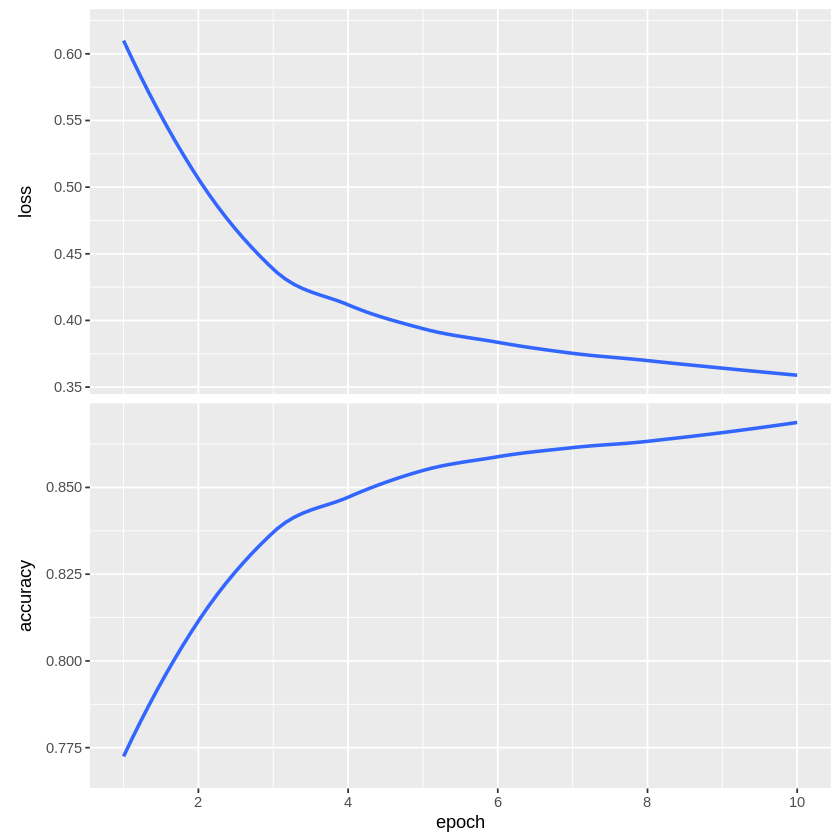

   user  system elapsed 
196.702  13.531 170.369 


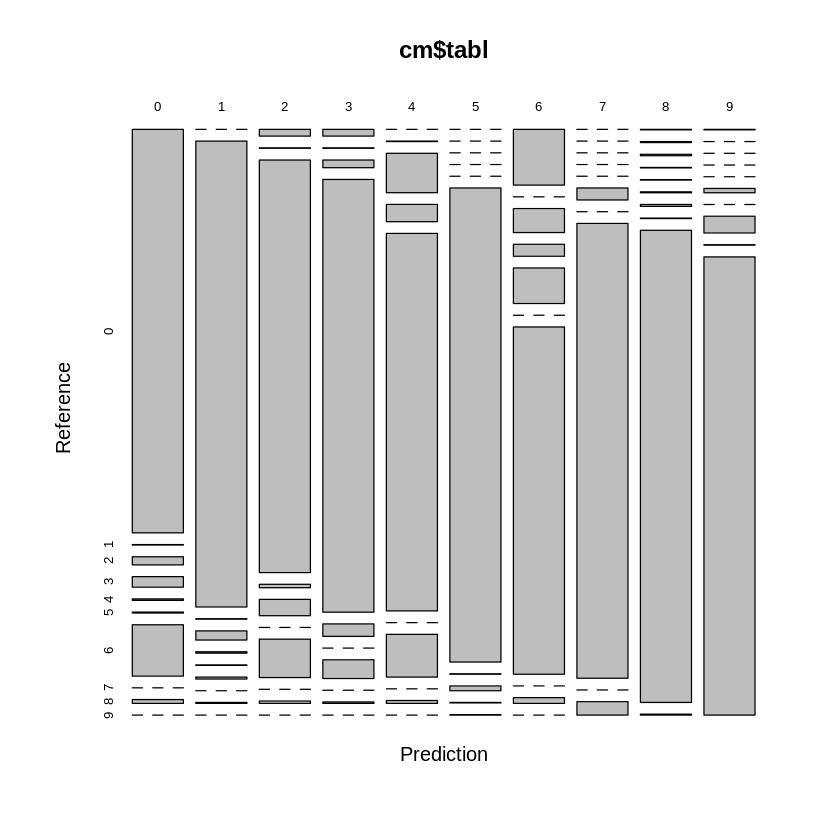

In [0]:
##########################################
## CREACIÓN DEL MODELO 
##########################################

#Para calcular el tiempo de la ejecucion
t <- proc.time()

# Definir arquitectura
model <- keras_model_sequential() 
model %>% 
  layer_conv_2d(filters = 32, kernel_size = c(3, 3), activation = "relu", padding = "Same", input_shape = c(28, 28, 1)) %>%
  layer_batch_normalization() %>%
  layer_conv_2d(filters = 32, kernel_size = c(3, 3), activation = "relu", padding = "Same") %>% 
  layer_batch_normalization() %>%
  layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = "relu", padding = "Same") %>% 
  layer_batch_normalization() %>% 
  layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = "relu", padding = "Same") %>% 
  layer_batch_normalization() %>%
  layer_max_pooling_2d(pool_size = c(2, 2)) %>%
  layer_flatten() %>%
  layer_dense(units = 256, activation = "relu") %>%
  layer_batch_normalization() %>%
  layer_dropout(0.25) %>%
  layer_dense(units = 10, activation = "softmax")
  
summary(model)


#lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
opt <- function() {
optimizer_adam(lr=0.01, decay=0.12)
}

# Compilar modelo
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = opt(),
  metrics = c('accuracy')
)

datagen <- image_data_generator(
        featurewise_center=FALSE,  # set input mean to 0 over the dataset
        samplewise_center=FALSE,  # set each sample mean to 0
        featurewise_std_normalization=FALSE,  # divide inputs by std of the dataset
        samplewise_std_normalization=FALSE,  # divide each input by its std
        zca_whitening=FALSE,  # dimesion reduction
        rotation_range=0.1,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=FALSE,  # randomly flip images
        vertical_flip=FALSE,
        validation_split = 0.2
)

datagen %>% fit_image_data_generator(x_train)


# Entrenamiento
history <- model %>% 
  fit_generator(
    flow_images_from_data(x_train, y_train, datagen, batch_size = 100),
    steps_per_epoch = 600,
    epochs = 10,
   # validation_data = (x_test, y_test),
    #validation_data = c(x_test, y_test),
  	#validation_steps = 600,
    #validation_split = 0.2
    #validation_data=val_datagen.flow(val_X, val_y, batch_size=BATCH_SIZE),
  )


# Guardar modelo (HDF5)
#model %>% save_model_hdf5("minist_cnn_basico.h5")

# Visualizar entrenamiento
plot(history)

##########################################
## EVALUAR EL MODELO CON LOS DATOS DE TEST
##########################################

# Calcular metrica sobre datos de validación
model %>% evaluate(x_test, y_test)

# Obtener predicciones de clase
predictions <- model %>% 
  predict_classes(x_test)

# Crear matriz de confusión
cm <- confusionMatrix(as.factor(mnist$test$y), as.factor(predictions))
cm_prop <- prop.table(cm$table)
plot(cm$tabl)

#Tiempo que tarda en crear el modelo y evaluarlo
t_final <- proc.time() - t
print(t_final)


# Después de la predicción

* Visualizacion de los resultados (imagenes vs etiqueta predecida)

**Ejecutar después de cualquier modelo predictivo, en caso de querer comprobar de forma visual la predicción**

* Visualización de las CURVAS ROC de las diferentes clases.

**Ejecutar después de cualquier modelo predictivo, en caso de querer comprobar esta medida de bondad**

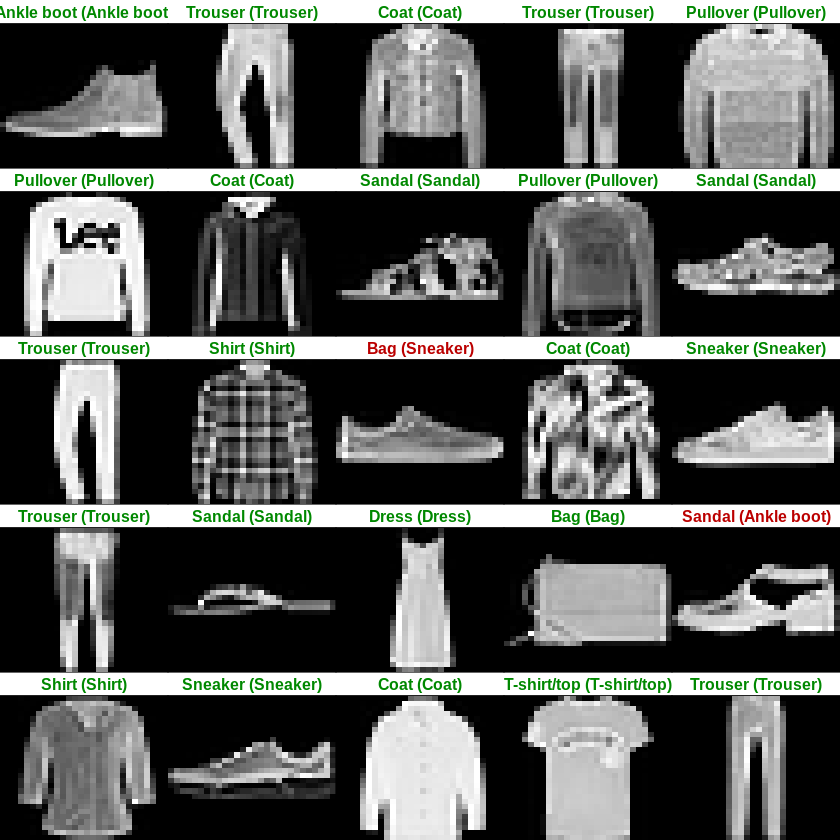

In [0]:
#Imagen junto con su etiqueta real VS su etiqueta predicha

par(mfcol=c(5,5))
par(mar=c(0, 0, 1.5, 0), xaxs='i', yaxs='i')
for (i in 1:25) { 
  img <- x_test[i, , , ]
  img <- t(apply(img, 2, rev)) 
  # subtract 1 as labels go from 0 to 9
  predicted_label <- predictions[i]
  true_label <- y_test_ori[i]
  if (predicted_label == true_label) {
    color <- '#008800' 
  } else {
    color <- '#bb0000'
  }
  image(1:28, 1:28, img, col = gray((0:255)/255), xaxt = 'n', yaxt = 'n',
        main = paste0(class_names[predicted_label + 1], " (",
                      class_names[true_label + 1], ")"),
        col.main = color)
}

A prediction instance
  with 10 cross validation runs (equal lengths)

A performance instance
  'False positive rate' vs. 'True positive rate' (alpha: 'Cutoff')
  for 10 cross validation runs 

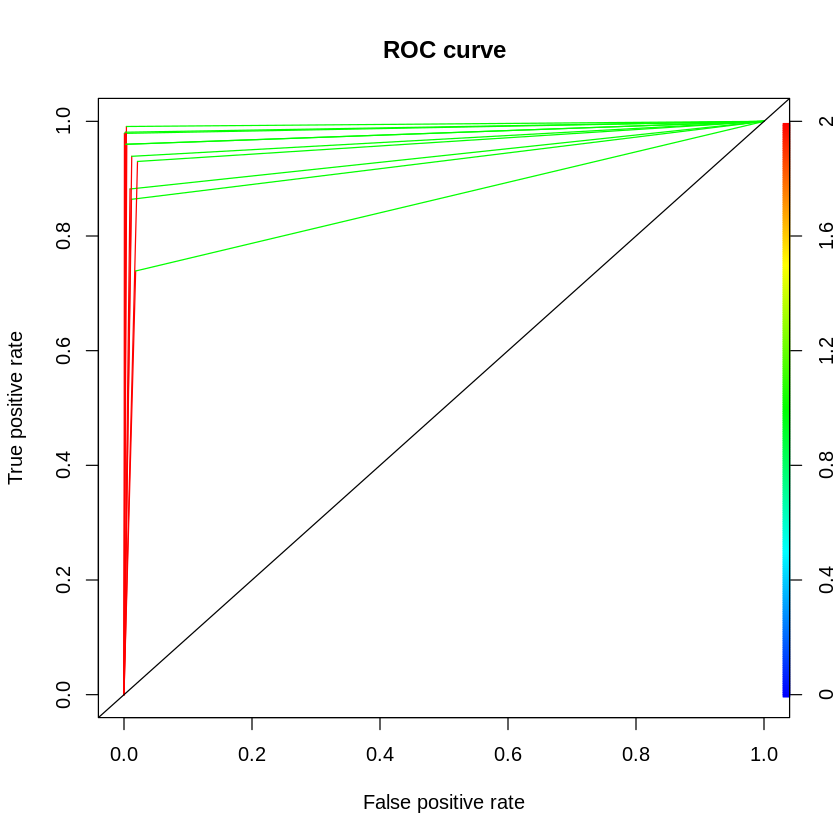

In [0]:
library(ROCR)
data(ROCR.simple)
pred <- prediction(  to_categorical(predictions,  10), y_test)
pred
perf <- performance(pred,"tpr","fpr")
perf
plot(perf, main = "ROC curve", colorize = TRUE, colorize.palette = rev(rainbow(256, start = 0, end = 4/6)))
#plot(perf, main = "ROC curve", colorize = TRUE, colorize.palette = rev(heat()))
abline(a = 0, b = 1)

auc <- performance(pred, measure = "auc")
#aucR <- auc@y.values[[1]]
#print(auc@y.values[[1]],auc@y.values[[2]],auc@y.values[[3]],auc@y.values[[4]],auc@y.values[[5]],auc@y.values[[6]],auc@y.values[[7]],auc@y.values[[8]],auc@y.values[[9]],auc@y.values[[10]])
#r fpr.stop=0.5 